# Reddit Post Title Classification

**Task:** Multi-class text classification  
**Classes:** Technology, Science, Sports, Books, Fitness  
**Course:** Learning from Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/reddit_titles.csv")
df.head()

,text,label
0,AMD Strix Halo vs Nvidia DGX Spark: Which AI w...,technology
1,AMD EXPO 1.2 could supercharge Ryzen CPUs with...,technology
2,China Is Worried AI Threatens Party Rule—and I...,technology
3,The AI backlash couldn’t have come at a better...,technology
4,"China says it hopes firms seek lawful, balance...",technology


In [3]:
df.shape


(4518, 2)

In [4]:
df.columns

Index(['text', 'label'], dtype='object')

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df['label'].value_counts()


label
technology    992
science       989
fitness       922
sports        900
books         715
Name: count, dtype: int64

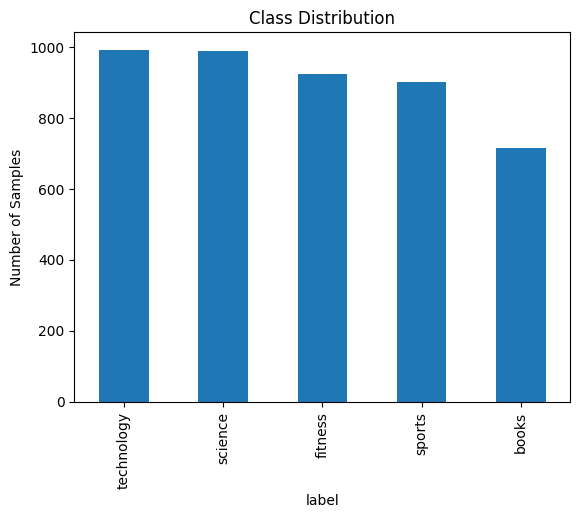

In [7]:
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("label")
plt.ylabel("Number of Samples")
plt.show()


In [8]:
df['title_length'] = df['text'].apply(lambda x: len(x.split()))
df['title_length'].describe()


count    4518.000000
mean       15.095396
std        11.368794
min         1.000000
25%         8.000000
50%        11.000000
75%        17.000000
max        56.000000
Name: title_length, dtype: float64

In [9]:
df.to_csv("../data/processed/reddit_titles_processed.csv", index=False)


## Text Preprocessing

Text preprocessing is handled implicitly through the TF-IDF vectorization process. 
This includes lowercasing, tokenization, and stopword removal. 
Given the short length of Reddit post titles, explicit stemming or lemmatization was not applied.


## Text Preprocessing (Simplified NLP)

Text preprocessing is performed implicitly using TF-IDF vectorization, which includes:
- Tokenization
- Lowercasing
- Stopword removal

This approach avoids external NLP dependencies while remaining effective for short-text classification.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000
)

X = tfidf.fit_transform(df['text'])
y = df['label']

X.shape


(4518, 5000)

In [11]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((3614, 5000), (904, 5000))

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train, y_train)


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
# here i edit
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# me edit
y_pred = log_reg.predict(X_test)
y_pred


array(['technology', 'fitness', 'science', 'technology', 'technology',
       'books', 'fitness', 'sports', 'sports', 'books', 'technology',
       'fitness', 'science', 'fitness', 'science', 'sports', 'science',
       'books', 'technology', 'fitness', 'fitness', 'technology',
       'technology', 'fitness', 'books', 'science', 'fitness', 'books',
       'fitness', 'science', 'sports', 'fitness', 'science', 'technology',
       'technology', 'science', 'technology', 'fitness', 'science',
       'science', 'books', 'books', 'sports', 'technology', 'science',
       'technology', 'sports', 'science', 'science', 'technology',
       'technology', 'books', 'technology', 'science', 'science',
       'technology', 'sports', 'technology', 'fitness', 'science',
       'science', 'sports', 'technology', 'science', 'technology',
       'technology', 'fitness', 'science', 'sports', 'science', 'science',
       'fitness', 'science', 'sports', 'technology', 'sports',
       'technology', 'science'

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       books       0.97      0.72      0.83       143
     fitness       1.00      0.98      0.99       184
     science       0.85      0.96      0.90       198
      sports       0.83      0.92      0.87       180
  technology       0.84      0.82      0.83       199

    accuracy                           0.89       904
   macro avg       0.90      0.88      0.88       904
weighted avg       0.89      0.89      0.89       904



## Model 2: Multinomial Naive Bayes


In [17]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [18]:
y_pred_nb = nb_model.predict(X_test)
y_pred_nb


array(['technology', 'fitness', 'science', 'technology', 'technology',
       'books', 'fitness', 'sports', 'sports', 'books', 'technology',
       'fitness', 'science', 'fitness', 'science', 'books', 'science',
       'books', 'technology', 'fitness', 'fitness', 'technology',
       'technology', 'fitness', 'fitness', 'science', 'fitness', 'books',
       'fitness', 'science', 'sports', 'fitness', 'technology',
       'technology', 'technology', 'science', 'technology', 'fitness',
       'science', 'science', 'books', 'books', 'sports', 'technology',
       'science', 'technology', 'sports', 'science', 'science',
       'technology', 'technology', 'books', 'technology', 'science',
       'science', 'technology', 'sports', 'technology', 'fitness',
       'science', 'science', 'sports', 'technology', 'science',
       'technology', 'technology', 'fitness', 'science', 'sports',
       'science', 'science', 'fitness', 'science', 'sports', 'sports',
       'sports', 'technology', 'science'

In [19]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb


0.8838495575221239

In [20]:
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

       books       0.91      0.70      0.79       143
     fitness       0.94      1.00      0.97       184
     science       0.84      0.96      0.90       198
      sports       0.90      0.88      0.89       180
  technology       0.85      0.84      0.84       199

    accuracy                           0.88       904
   macro avg       0.89      0.88      0.88       904
weighted avg       0.89      0.88      0.88       904



## Model 3: Linear Support Vector Machine (SVM)


In [21]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [22]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm


array(['technology', 'fitness', 'science', 'technology', 'technology',
       'books', 'fitness', 'sports', 'sports', 'books', 'technology',
       'fitness', 'science', 'fitness', 'science', 'books', 'science',
       'books', 'technology', 'fitness', 'fitness', 'technology',
       'technology', 'fitness', 'books', 'science', 'fitness', 'books',
       'fitness', 'science', 'sports', 'fitness', 'science', 'technology',
       'technology', 'science', 'technology', 'fitness', 'science',
       'science', 'books', 'books', 'technology', 'technology', 'science',
       'technology', 'sports', 'science', 'science', 'technology',
       'technology', 'books', 'technology', 'science', 'science',
       'technology', 'sports', 'technology', 'fitness', 'science',
       'technology', 'sports', 'technology', 'science', 'technology',
       'technology', 'fitness', 'science', 'sports', 'science', 'science',
       'fitness', 'science', 'sports', 'technology', 'sports',
       'technology', 'sc

In [23]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm


0.9026548672566371

In [24]:
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

       books       0.91      0.83      0.86       143
     fitness       1.00      1.00      1.00       184
     science       0.86      0.94      0.90       198
      sports       0.88      0.92      0.90       180
  technology       0.88      0.82      0.85       199

    accuracy                           0.90       904
   macro avg       0.90      0.90      0.90       904
weighted avg       0.90      0.90      0.90       904



## Model 4: Multi-Layer Perceptron (MLP)


In [25]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=20,
    random_state=42
)

mlp_model.fit(X_train, y_train)


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(100,)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",20
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [26]:
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp


array(['technology', 'fitness', 'science', 'technology', 'technology',
       'books', 'fitness', 'sports', 'sports', 'books', 'technology',
       'fitness', 'science', 'fitness', 'science', 'books', 'science',
       'books', 'technology', 'fitness', 'fitness', 'technology',
       'technology', 'fitness', 'books', 'science', 'fitness', 'books',
       'fitness', 'science', 'books', 'fitness', 'technology',
       'technology', 'technology', 'science', 'technology', 'fitness',
       'science', 'science', 'books', 'books', 'technology', 'technology',
       'science', 'technology', 'sports', 'science', 'science',
       'technology', 'technology', 'books', 'technology', 'science',
       'science', 'technology', 'sports', 'technology', 'fitness',
       'science', 'technology', 'sports', 'technology', 'science',
       'technology', 'technology', 'fitness', 'science', 'sports',
       'science', 'science', 'fitness', 'science', 'sports', 'technology',
       'sports', 'technology', '

In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_mlp


0.9081858407079646

In [28]:
print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

       books       0.89      0.83      0.86       143
     fitness       0.98      1.00      0.99       184
     science       0.88      0.94      0.91       198
      sports       0.92      0.92      0.92       180
  technology       0.87      0.83      0.85       199

    accuracy                           0.91       904
   macro avg       0.91      0.91      0.91       904
weighted avg       0.91      0.91      0.91       904



## Feature Engineering: Bag-of-Words (BoW)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000
)

X_bow = bow_vectorizer.fit_transform(df['text'])
X_bow.shape


(4518, 5000)

## Feature Engineering: Custom Domain-Based Features


In [30]:
import numpy as np

# Title length (already computed earlier, recompute safely)
df['title_length'] = df['text'].apply(lambda x: len(x.split()))

# Number of digits (useful for sports scores, years, versions)
df['num_digits'] = df['text'].apply(lambda x: sum(char.isdigit() for char in x))

# Presence of question mark
df['has_question'] = df['text'].apply(lambda x: 1 if '?' in x else 0)

# Presence of exclamation mark
df['has_exclamation'] = df['text'].apply(lambda x: 1 if '!' in x else 0)

df[['title_length', 'num_digits', 'has_question', 'has_exclamation']].head()


,title_length,num_digits,has_question,has_exclamation
0,14,0,1,0
1,23,2,0,0
2,12,0,0,0
3,10,0,0,0
4,12,0,0,0


## Cross-Validation (5-Fold)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import numpy as np

svm_cv = LinearSVC(random_state=42)

cv_scores = cross_val_score(
    svm_cv,
    X,
    y,
    cv=5,
    scoring='accuracy'
)

cv_scores, np.mean(cv_scores)


(array([0.90929204, 0.90265487, 0.9159292 , 0.89700997, 0.90919158]),
 np.float64(0.9068155313164574))

## Hyperparameter Tuning (Linear SVM)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

svm_grid = GridSearchCV(
    LinearSVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

svm_grid.fit(X_train, y_train)

svm_grid.best_params_, svm_grid.best_score_


({'C': 1}, np.float64(0.9034321444581097))

## Confusion Matrix (Best Model: Linear SVM)

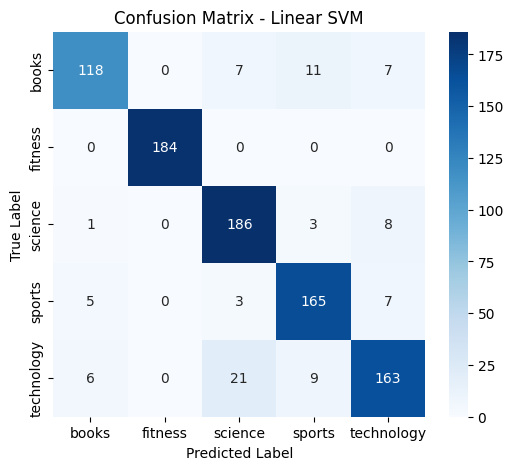

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=svm_model.classes_,
    yticklabels=svm_model.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Linear SVM")
plt.show()


## Learning Curves (Linear SVM)


In [34]:
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    LinearSVC(C=1, random_state=42),
    X,
    y,
    cv=5,
    scoring='accuracy',
    train_sizes=[0.3, 0.5, 0.7, 0.9, 1.0]  # avoid too-small subsets
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

train_sizes, train_mean, val_mean


(array([1084, 1807, 2529, 3252, 3614]),
 array([0.99944649, 0.99933592, 0.99762752, 0.99692497, 0.99723298]),
 array([0.36675242, 0.53098595, 0.68392869, 0.90615181, 0.90681553]))

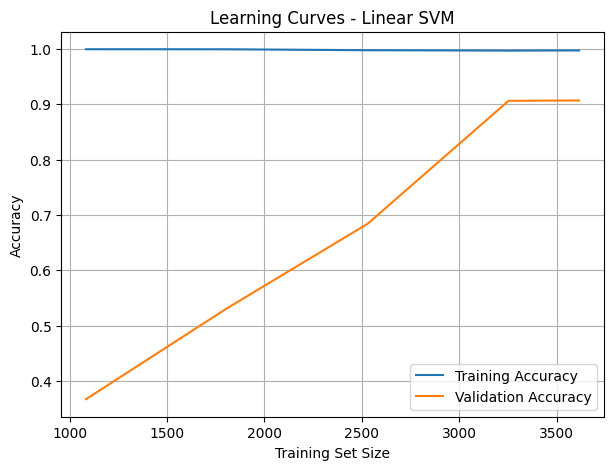

In [35]:
plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves - Linear SVM")
plt.legend()
plt.grid(True)
plt.show()


## Bias–Variance Analysis and Overfitting Prevention

### Bias–Variance Analysis

The learning curves indicate that the training accuracy remains high while the validation accuracy steadily increases and converges toward the training accuracy as more data is used. This behavior suggests that the model has low bias and does not suffer from significant underfitting. The relatively small gap between training and validation performance indicates controlled variance and good generalization.

Overall, the Linear SVM demonstrates a good bias–variance tradeoff for this text classification task.


### Regularization and Overfitting Prevention

Several techniques were applied to prevent overfitting in this project:

- **L2 Regularization:** Linear SVM and Logistic Regression include regularization controlled by the parameter C, which was tuned using cross-validation.
- **Early Stopping / Limited Training:** The MLP model was trained with a limited number of iterations to reduce overfitting.
- **Feature Dimensionality Control:** TF-IDF and Bag-of-Words representations were limited to a maximum number of features to reduce model complexity.
- **Validation-based Model Selection:** Cross-validation and grid search were used to select optimal hyperparameters.

These techniques collectively helped improve generalization and model robustness.


## Model Comparison Summary

In [36]:
from sklearn.metrics import accuracy_score

# Recompute all accuracies safely
accuracy_lr = accuracy_score(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

accuracy_lr, accuracy_nb, accuracy_svm, accuracy_mlp


(0.8871681415929203,
 0.8838495575221239,
 0.9026548672566371,
 0.9081858407079646)

In [37]:
# this my code
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Multinomial Naive Bayes",
        "Linear SVM",
        "MLP (Neural Network)"
    ],
    "Accuracy": [
        accuracy_lr,
        accuracy_nb,
        accuracy_svm,
        accuracy_mlp
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.887168
1,Multinomial Naive Bayes,0.883850
2,Linear SVM,0.902655
3,MLP (Neural Network),0.908186
